# Problem set 02: Logistic regression model and their properties

Consider the following binary model: <br>
$$P(Y_i = y_i) = \pi_i^{y_i} (1- \pi_i)^{1-y_i}$$ <br>
where 
$$\pi_i = \frac{e^{x_i' \beta}}{1+e^{x_i' beta}}$$

### a) Simulate the data using the following values: <br>
$n = 1000$, $x_{0i} = 1 \forall i $,  $x_{1i} \sim{U(18,60)}$, $x_{2i} \sim{B(0.5)}$,  $\beta_0 = -1$,  $\beta_1= 0.1$, $\beta_2 = 1$ 

In [5]:
#rm(list=ls())
library("ggplot2")
set.seed(44)
library(maxLik) #Maximization 
#library(repr) # look up why used 
#library(Rlab) # not used
library(MASS) #GLM
options(repr.plot.width=10, repr.plot.height=7)


In [6]:
#Functions 
Data_Generator = function(X, beta) {
    pi = c() 
    Y = c()
    Y_test = c()
    pi = exp(beta[1] + beta[2] * X[,2]+beta[3]*X[,3]) / (1 + exp(beta[1] + beta[2] * X[,2]+beta[3]*X[,3]))
    
    for (i in 1:length(pi)){
        Y[i] = rbinom(n = 1, size = 1, prob = pi[i])
    }
    return(cbind(Y,pi))
}

likelihood = function(beta){
    #maybe computing pi here beforehand and than its more easily readable
 likeli = prod((exp(X%*%beta)/(1+exp(X%*%beta)))^(Y)*(1-(exp(X%*%beta)/(1+exp(X%*%beta))))^(1-Y))
}



loglike = function(beta){#the likelihood function for the logit model from the lecture

  ll <- sum(-Y*log(1 + exp(-(X%*%beta))) - (1-Y)*log(1 + exp(X%*%beta)))
  return(ll)
}

#### Remark: We are working with different vectors seperately for the different Xs in because it works more nicely with the likelihood functions, as they are given in the class.

In [7]:
N = 1000
bi_prob_x2 = 0.5
beta = c(-2,0.1,1)
X_1 = sort(runif(N, min = 18, max = 60)) #we kept X_1 and X_2 explicitely to use some code out of the classificaition script
X_2 = rbinom( n = N, size = 1 ,prob = bi_prob_x2)
X = cbind(rep(1, N), X_1, X_2)
Data = Data_Generator(X, beta) #Getting the Ys 
Y = Data[,1]
Data_b = data.frame(cbind(Y, X))

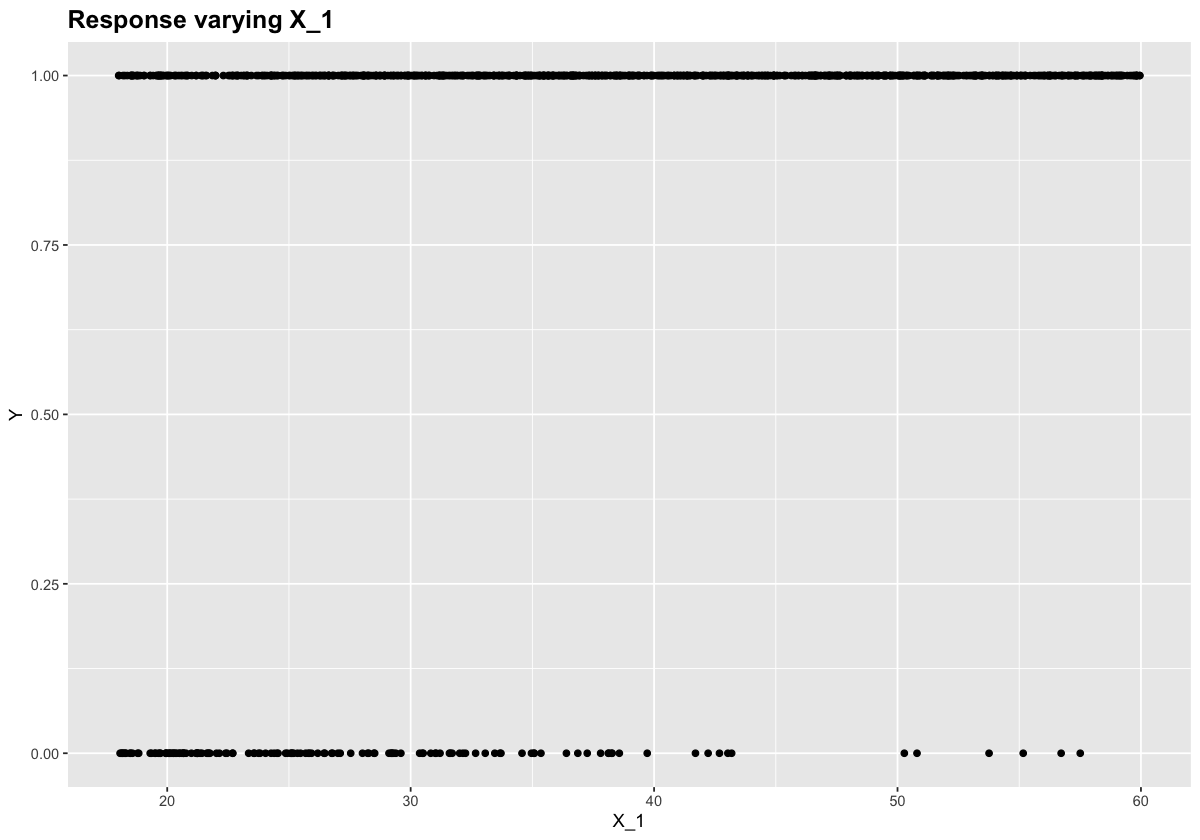

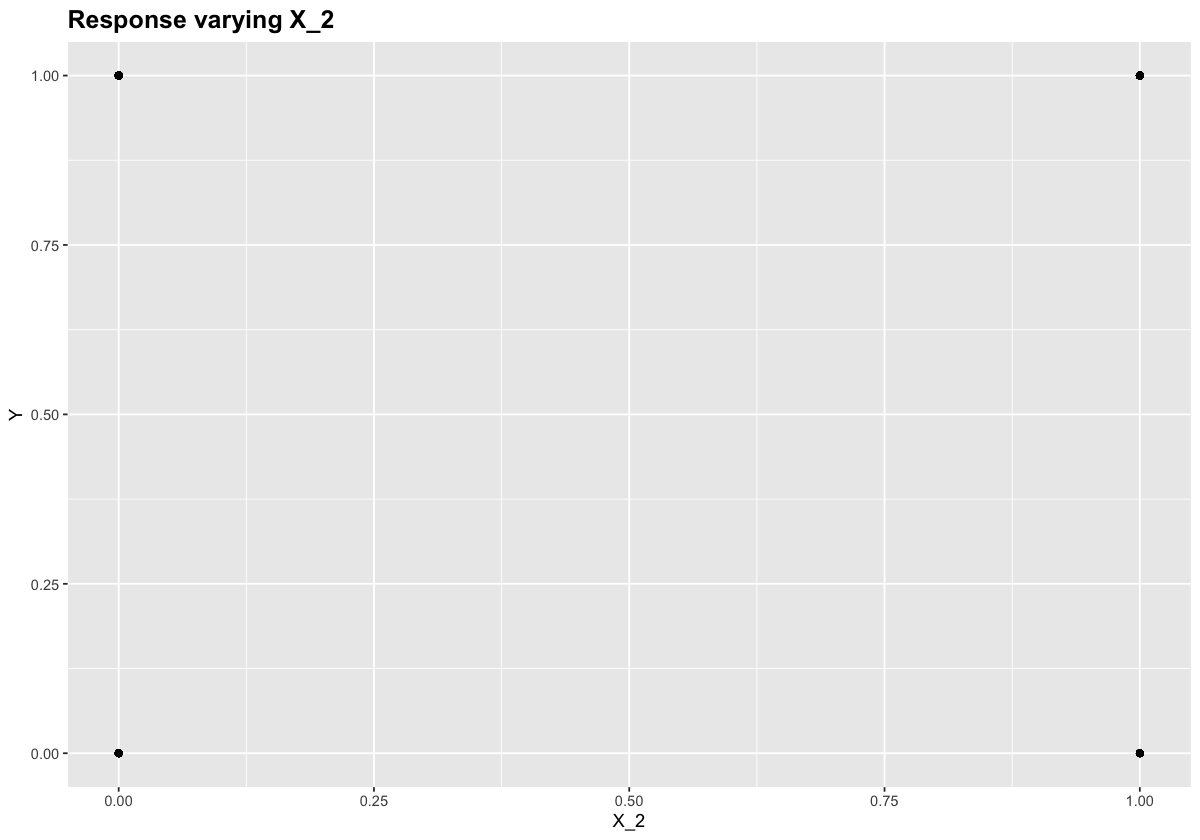

In [8]:
Plot1 = ggplot(Data_b, mapping = aes(x = X_1, y = Y)) +   
        ggtitle("Response varying X_1")+
        geom_point()+ 
        theme(plot.title = element_text(size = 15, face = "bold"))

            
Plot2 = ggplot(Data_b, mapping = aes(x = X_2, y = Y)) +   
        ggtitle("Response varying X_2")+
        geom_point()+ 
        theme(plot.title = element_text(size = 15, face = "bold"))

Plot1
Plot2

- We can see that for small $X_1$ variables, the response tends to be more often zero than one. 
- For $X_2$ the plot is not interpretable.

### b) Write down the likelihood function in R as defined in the lecture

- See function section: We computed the log-likelihood function by hand by ourselves. It differs from the one given in class, but has the same maxima:


$$P={(\frac{e^{x_0+\beta_1x_{1i}+\beta_2x_{2i}}}{1+e^{x_0+\beta_1x_{1i}+\beta_2x_{2i}}})}^y{(1-\frac{e^{x_0+\beta_1x_{1i}+\beta_2x_{2i}}}{1+e^{x_0+\beta_1x_{1i}+\beta_2x_{2i}}})}^{1-y}$$

$$Assume\ \ z=x_0+\beta_1\ x_1i+\beta_2\ x_2i$$

$$Then\ \ \ P=\left(\frac{e^z}{1+e^z}\right)^y\left(1-\frac{e^z}{1+e^z}\right)^{1-y}$$

$$log{P}=log\left(\frac{e^z}{1+e^z}\right)^y\left(1-\frac{e^z}{1+e^z}\right)^{1-y}$$

$$=\log\left(\frac{e^z}{1+e^z}\right)^y{+log\left(1-\frac{e^z}{1+e^z}\right)}^{1-y}$$

$$=\log{e^{zy}}-\log{\left(1+e^z\right)^y}+\log{\left(\frac{1+e^z-e^z}{1+e^z}\right)^{1-y}}$$

$$=\log{e^{zy}}-\log{\left(1+e^z\right)^y}+\log{1^{1-y}}-\log{\left(1+e^z\right)^{1-y}}$$

$$=\log{\frac{e^{zy}}{\left(1+e^z\right)^y\left(1+e^z\right)^{1-y}}}$$

$$=\log{\frac{e^{zy}}{1+e^z}}$$

$$Then, P=\frac{e^{zy}}{1+e^z}$$

$$Therefore,\ the\ likelihood\ function\ is\ \ \ P=\frac{e^{zy}}{1+e^z}\ ,\ where\ z=x_0+\beta_1x_{1i}+\beta_2x_{2i}.$$

- Even though this is not exactly the same log-likelihood function we use, they are equivalent.

### c) Plot the likelihood function and the log likelihood function for a range of values for the two parameters separetely and show that they are maximised at the same value.

In [9]:
p_beta_1 = seq(-1,1,by=0.01) #possible beta 1s 
p_beta_2 = seq(-10,10,by = 0.1) # possible beta 2s

if (length(p_beta_1) ==length(p_beta_2)){
    ourl = length(p_beta_1)
} else{
    print("Please define equally long possible betas") #they HAVE TO BE equally long to perform the max comparison
}
v_1_beta = cbind(beta_0 = rep(beta[1], ourl), beta_1 = p_beta_1, beta_2 = rep(beta[3], ourl)) #version 1, varying beta1
v_2_beta = cbind(beta_0=  rep(beta[1], ourl), beta_1 = rep(beta[2], ourl), beta_2 = p_beta_2)  #version 2, varying beta2

In [10]:
#likelihood function

likelihood_possible_betas = matrix(nrow = ourl, ncol = 2) #first column is variation 1 and the second is variation 2
log_likelihood_possible_betas = matrix(nrow = ourl, ncol = 2) #first column is variation 1 and the second is variation 2
self_likelihood = matrix(nrow = ourl, ncol = 2)


for (i in 1:ourl){ #compute the likelihood for a grid of betas
    likelihood_possible_betas[i,1] = likelihood(v_1_beta[i,])
    likelihood_possible_betas[i,2] = likelihood(v_2_beta[i,])
}


for (j in 1:ourl){#compute the log-likelihood for a grid of betas
    log_likelihood_possible_betas[j,1] = loglike(v_1_beta[j,])
    log_likelihood_possible_betas[j,2] = loglike(v_2_beta[j,])
}


#since they have the same length, the maximum should be reached at the same index
if (which.max( likelihood_possible_betas[,1] ) == which.max( log_likelihood_possible_betas[,1])){
    print("likelihood and log likelihood function have the same maximum for a variation in beta1!")
}else{
    print("likelihood and log-likelihood function have different maxima for a variation in beta1! ")
}       

if (which.max( likelihood_possible_betas[,2] ) == which.max( log_likelihood_possible_betas[,2])){
    print("likelihood and log likelihood function have the same maximum for a variation in beta2!")
}else{
    print("likelihood and log-likelihood function have different maxima for a variation in beta2! ")
}

[1] "likelihood and log likelihood function have the same maximum for a variation in beta1!"
[1] "likelihood and log likelihood function have the same maximum for a variation in beta2!"


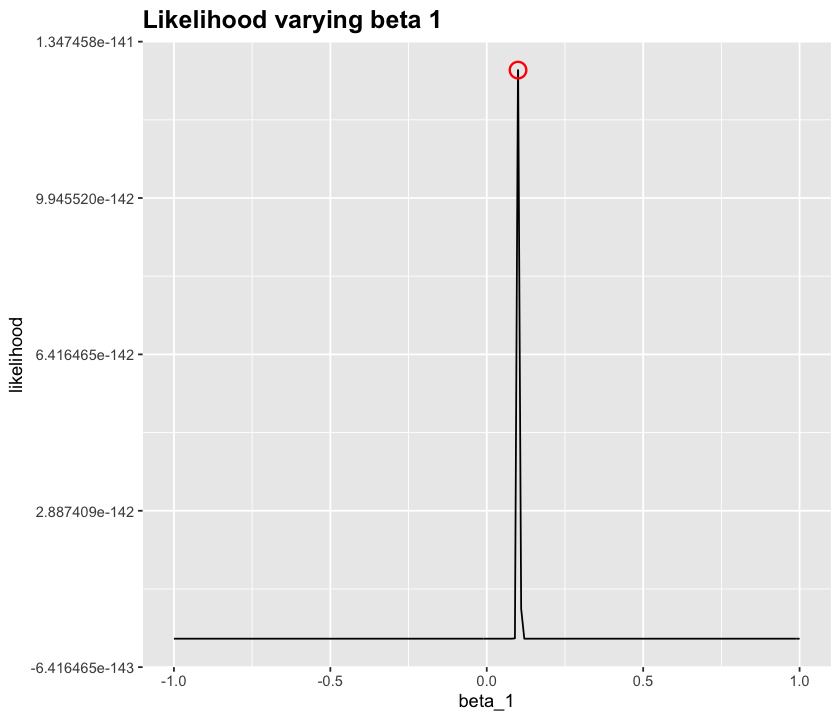

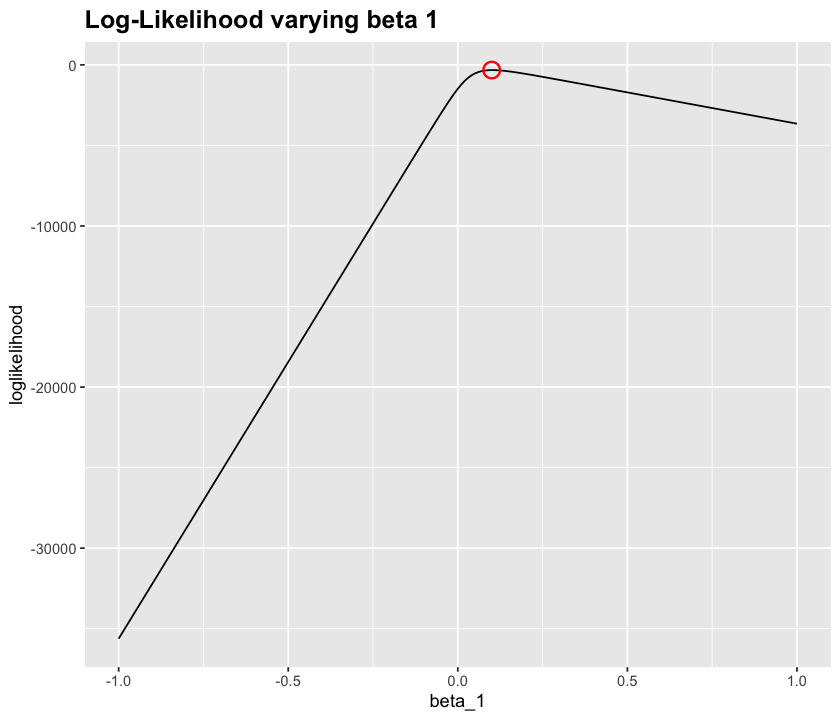

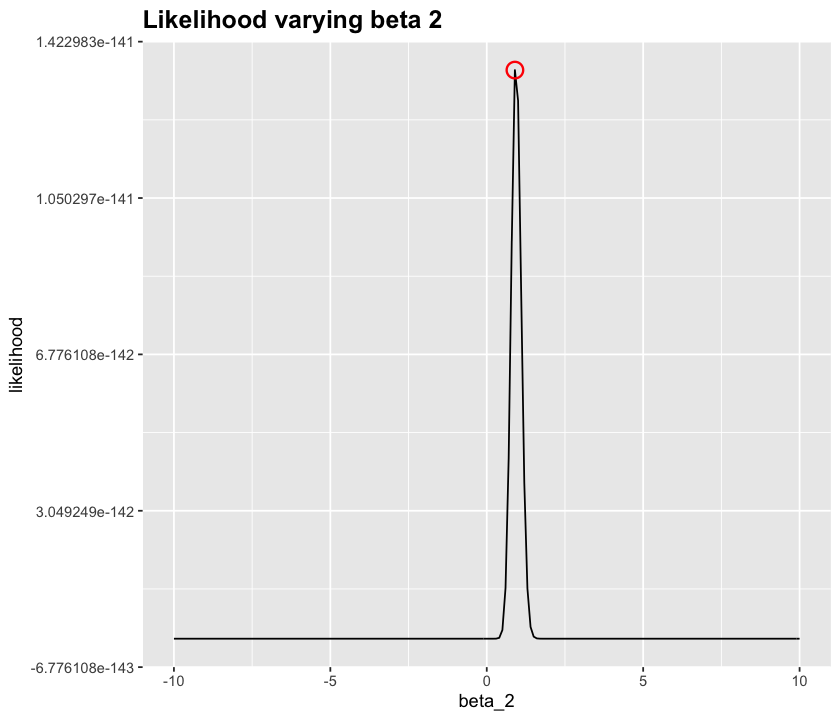

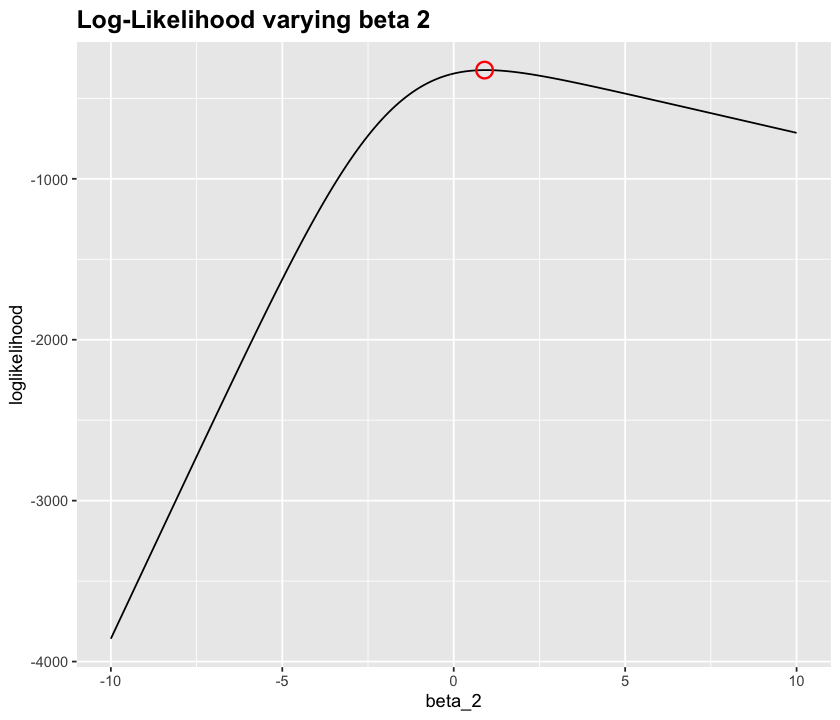

In [11]:
#plotting
options(repr.plot.width=10, repr.plot.height=7)

df = data.frame(cbind(likelihood = likelihood_possible_betas[,1], beta_1 = v_1_beta[,2]))
Likelihood1 = ggplot(df, mapping = aes(x = beta_1, y = likelihood)) +   
        ggtitle("Likelihood varying beta 1")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_line()+
        geom_point(data=df[which.max(df$likelihood),],
             pch=21, fill=NA, size=4, colour="red", stroke=1)

df = data.frame(cbind(loglikelihood = log_likelihood_possible_betas[,1], beta_1 = v_1_beta[,2]))
LogLikelihood1 = ggplot(df, mapping = aes(x = beta_1, y = loglikelihood)) +   
        ggtitle("Log-Likelihood varying beta 1")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_line()+
        geom_point(data=df[which.max(df$loglikelihood),],
             pch=21, fill=NA, size=4, colour="red", stroke=1)


df = data.frame(data.frame(cbind(likelihood = likelihood_possible_betas[,2], beta_2 = v_2_beta[,3])))
Likelihood2 = ggplot(df, mapping = aes(x = beta_2, y = likelihood)) +   
        ggtitle("Likelihood varying beta 2")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_line()+
        geom_point(data=df[which.max(df$likelihood),],
             pch=21, fill=NA, size=4, colour="red", stroke=1)

df = data.frame(cbind(loglikelihood = log_likelihood_possible_betas[,2], beta_2 = v_2_beta[,3]))
LogLikelihood2 = ggplot(df, mapping = aes(x = beta_2, y = loglikelihood)) +   
        ggtitle("Log-Likelihood varying beta 2")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_line()+
        geom_point(data=df[which.max(df$loglikelihood),],
             pch=21, fill=NA, size=4, colour="red", stroke=1)
options(repr.plot.width=7, repr.plot.height=6)
Likelihood1
LogLikelihood1
Likelihood2
LogLikelihood2
rm(df)

### d) Estimate $\beta_0$,$\beta_1$,$\beta_2$ using the maximum likelihood and calculate the standard errors. Use the estimation template provided in the lecture. 

In [12]:
#I took them from the lecture

estim = maxBFGS(loglike,finalHessian=TRUE,start=c(1,0.1,1))#initialize estimation procedure.
estim_par = estim$estimate# give out parameter estimates.
estim_par
estim_hess = estim$hessian  ###the optimization routine returns the hessian matrix at the last iteration.
Cov = -(solve(estim_hess))  ##the covariance matrix is the (negative) inverse of the hessian matrix.
sde = sqrt(diag(Cov))       #the standard errors are the square root of the diagonal of the inverse Hessian. 
sde


#to double check we use the inbuilt glm function for binomial models
glm_fit=glm(Y ~ X_1+X_2, data=Data_b ,family=binomial)

summary(glm_fit)
##the standard errors are slightly different than those computed by hand, in some iterations

[1] -2.4038328  0.1153468  0.9047881

[1] 0.36234255 0.01124653 0.20609951


Call:
glm(formula = Y ~ X_1 + X_2, family = binomial, data = Data_b)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2063   0.1581   0.3051   0.5689   1.3180  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.40382    0.36583  -6.571 5.00e-11 ***
X_1          0.11535    0.01145  10.076  < 2e-16 ***
X_2          0.90479    0.20626   4.387 1.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 813.55  on 999  degrees of freedom
Residual deviance: 646.53  on 997  degrees of freedom
AIC: 652.53

Number of Fisher Scoring iterations: 6


- $\beta_0$, $\beta_1$, $\beta_2$, which are computed by hands are the same as computed by the GLM function 
- Standard errors differ by a slight margin

### e) Propose and calculate a suitable method for the interpretation of the coefficients as discussed in the lecture

#### Possible suitable methods for the interpretation of the coefficients:

1) One could calculate the marginal effects over the x ranges <br>
2) One could compute the changes in probabilities for a grid of x jumps 

#### Before interpreting the coefficients using any method: Interpreting the sign:
- The $\beta_1$ coefficient is positive, thus a change in $X_1$ values is corresponding to a positive change in probabilities. The margin of this effect crucially depends on the level of $X_1$ we are at.<br> <br>
- This can be visualised by marginal effects, depending on the level of x values. <br>
For $X_2$ it is the same, but since $X_2$ can just have realize on two different levels the interpretation is easier.

#### How to interprete these coefficients, holding everything else fixed:
-How would you interpret the coefficient value 𝛽𝑗 ? Assuming that everything else remains fixed:

- For every unit increase in 𝑥𝑗 the log-odds ratio increases by 𝛽𝑗.
- For every unit increase in 𝑥𝑗 the odds ratio increases by 𝑒𝛽𝑗.
- For every increase of 𝑥𝑗 from 𝑘 to 𝑘+Δ the odds ratio increases by 𝑒𝛽𝑗Δ
- If the coefficient is negative, then an increase in 𝑥𝑗 leads to a decrease in the odds ratio.

#### Functions

In [13]:
#### Calculate the marginal effect for a range of X and computes the pi values; all given beta values
###This here is for beta1
marginals = function(x2, beta){ 
####Calculate for a range of x values###
    x2 = x2
    dx<-c()
    for(i in 1:length(X_1)){  ##this is x_1
      pi<-exp(beta[1] + beta[2] * X_1[i]+beta[3]*x2) / (1 + exp(beta[1] + beta[2] * X_1[i]+beta[3]*x2))
      dx[i]<-beta[2]*(pi)*(1-pi)  #these are the marginals
    }

#####Predicted probabilities for beta1######
    pi<-c()
    for(i in 1:length(X_1)){ 
        pi[i]<-exp(beta[1] + beta[2] * X_1[i]+beta[3]*x2) / (1 + exp(beta[1] + beta[2] * X_1[i]+beta[3]*x2))
      #dx[i]<-estim.par[2]*(pi)*(1-pi) 
    }
    
    return(data.frame(cbind(X_1, dx, pi)))
    
}

###This here is for beta2
marginals2 = function(x1, beta){ 
  ####Calculate for a range of x values###
  x1 = x1
  dx<-c()
  for(i in 1:length(X_2)){  ##this is x_2
    pi<-exp(beta[1] + beta[2] * x1+beta[3]*X_2[i]) / (1 + exp(beta[1] + beta[2] * x1+beta[3]*X_2[i]))
    dx[i]<-beta[3]*(pi)*(1-pi) 
  }
  #####Predicted probabilities for beta2######
  pi<-c()
  for(i in 1:length(X_2)){
    pi[i]<-exp(beta[1] + beta[2] * x1+beta[3]*X_2[i]) / (1 + exp(beta[1] + beta[2] * x1+beta[3]*X_2[i]))
    #dx[i]<-estim.par[3]*(pi)*(1-pi) 
  }
  
  return(data.frame(cbind(X_2, dx, pi)))
  
}


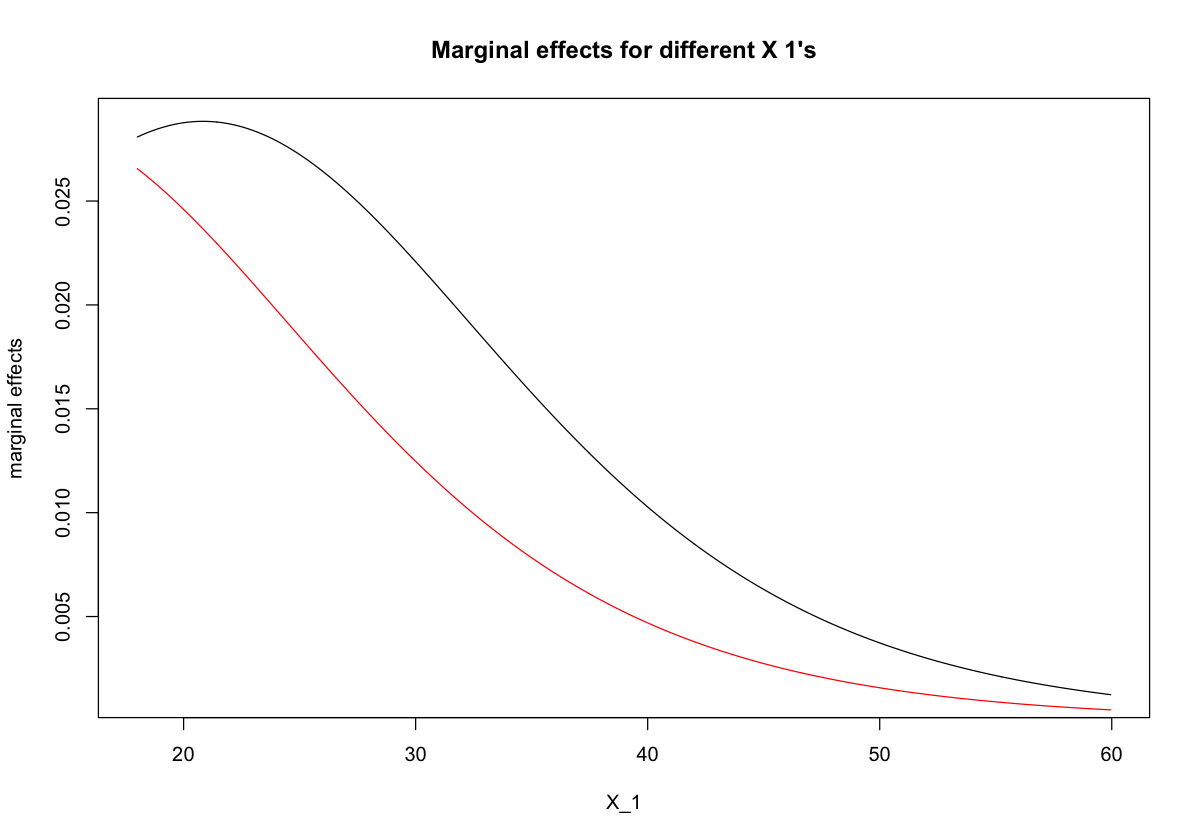

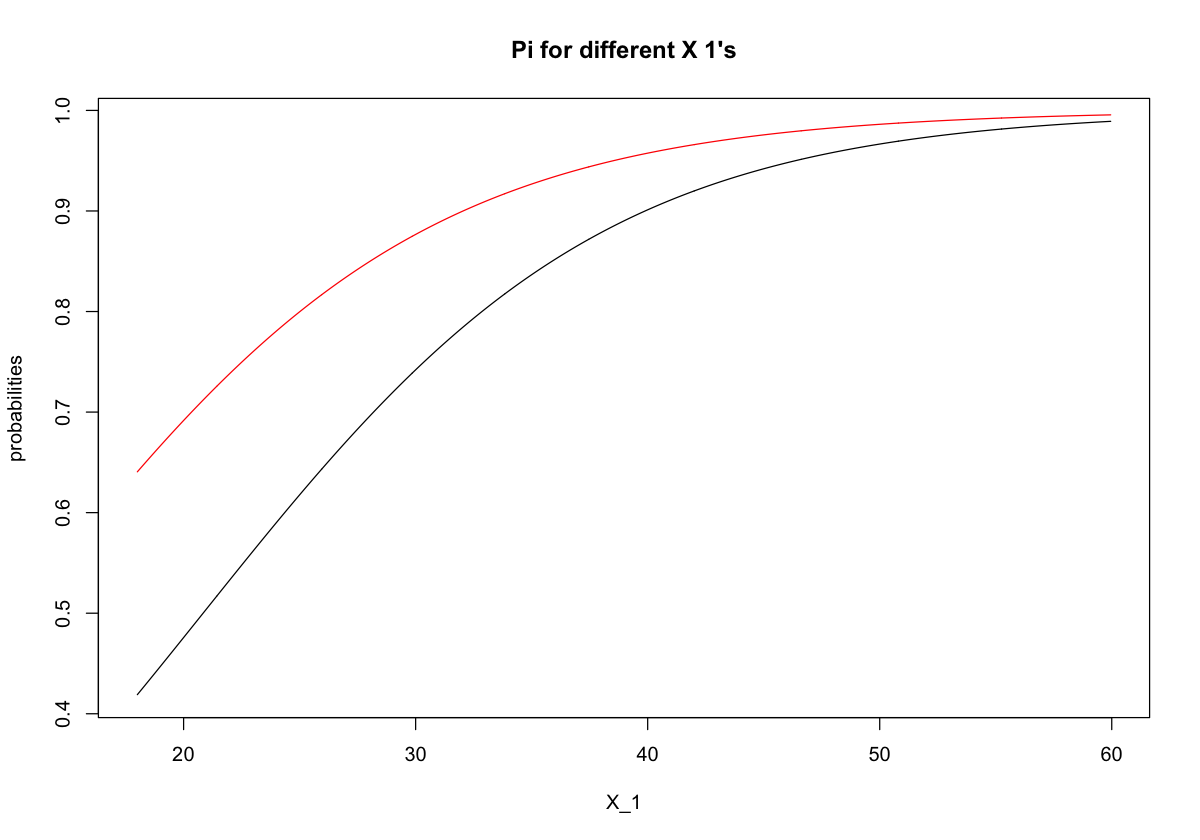

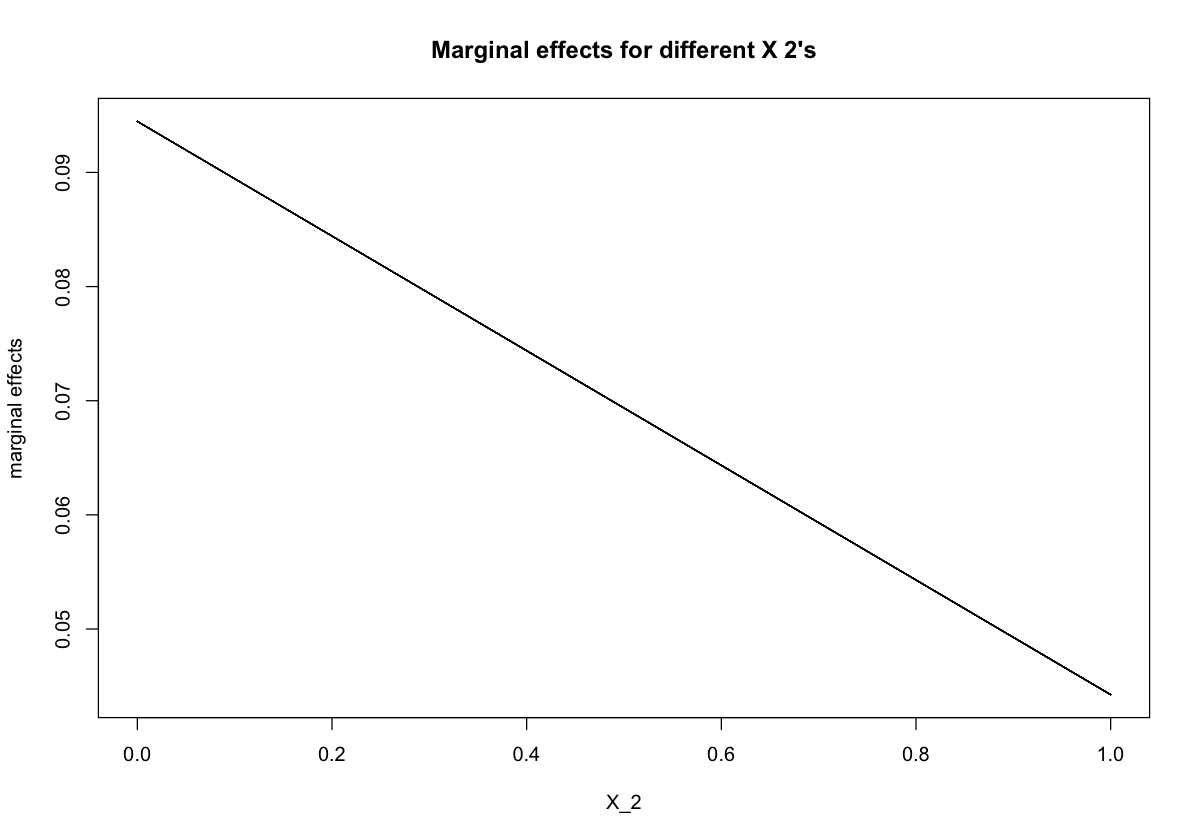

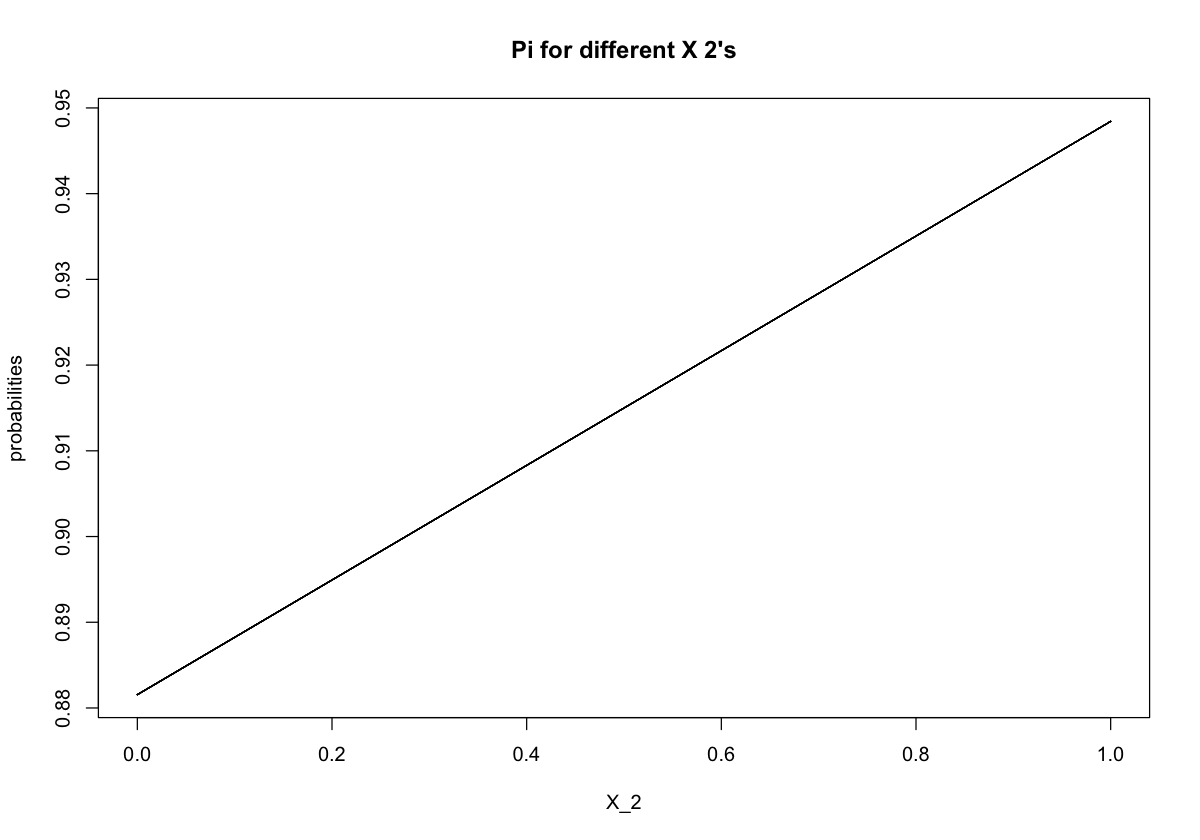

In [14]:
x2_1 = 1 
x2_0 = 0
x1_1 =mean(X_1) ###We compute the marginal effect of X_2 by fixing X_1 as a constant on its means



#computing
marginals_1 = marginals(x2_1, estim_par) #
marginals_0 = marginals(x2_0, estim_par)

marginals_1_2 = marginals2(x1_1, estim_par) #



#plotting
options(repr.plot.width=10, repr.plot.height=7)
plot(X_1,marginals_0[,2],ylab = "marginal effects",type="l", main="Marginal effects for different X 1's")
lines(X_1,marginals_1[,2],col="red")
plot(X_1,marginals_0[,3],ylab = "probabilities",type="l", main="Pi for different X 1's")
lines(X_1,marginals_1[,3],col="red")

plot(X_2,marginals_1_2[,2],ylab = "marginal effects",type="l", main="Marginal effects for different X 2's")

plot(X_2,marginals_1_2[,3],ylab = "probabilities",type="l", main="Pi for different X 2's")



In [15]:
prob_jump = data.frame(matrix(NA, nrow = 4, ncol = 2))
colnames(prob_jump) = c("X_2_1", "X_2_0")
names = c("20-30", "30-40", "40-50", "50-60")
# X_2 = 0
#jump from 20 to 30 
Pi_jump =  subset(marginals_1,((marginals_1$X_1 > 20) & (marginals_1$X_1 < 30)),select = (c("pi")))
prob_jump[1,1] = Pi_jump[nrow(Pi_jump),] - Pi_jump[1,] 
#jump from 30 to 40 
Pi_jump =  subset(marginals_1,((marginals_1$X_1 > 30) & (marginals_1$X_1 < 40)),select = (c("pi")))
prob_jump[2,1] = Pi_jump[nrow(Pi_jump),]- Pi_jump[1,] 
#jump from 40 to 50 
Pi_jump =  subset(marginals_1,((marginals_1$X_1 > 40) & (marginals_1$X_1 < 50)),select = (c("pi")))
prob_jump[3,1] =  Pi_jump[nrow(Pi_jump),]- Pi_jump[1,] 
#jump from 50 to 60 
Pi_jump =  subset(marginals_1,((marginals_1$X_1 > 50) & (marginals_1$X_1 < 60)),select = (c("pi")))
prob_jump[4,1] =  Pi_jump[nrow(Pi_jump),] - Pi_jump[1,]


# X_2 = 1
#jump from 20 to 30 
Pi_jump =  subset(marginals_0,((marginals_0$X_1 > 20) & (marginals_0$X_1 < 30)),select = (c("pi")))
prob_jump[1,2] = Pi_jump[nrow(Pi_jump),] - Pi_jump[1,] 
#jump from 30 to 40 
Pi_jump =  subset(marginals_0,((marginals_0$X_1 > 30) & (marginals_0$X_1 < 40)),select = (c("pi")))
prob_jump[2,2] = Pi_jump[nrow(Pi_jump),] - Pi_jump[1,] 
#jump from 40 to 50 
Pi_jump =  subset(marginals_0,((marginals_0$X_1 > 40) & (marginals_0$X_1 < 50)),select = (c("pi")))
prob_jump[3,2] = Pi_jump[nrow(Pi_jump),] - Pi_jump[1,] 
#jump from 50 to 60 
Pi_jump =  subset(marginals_0,((marginals_0$X_1 > 50) & (marginals_0$X_1 < 60)),select = (c("pi")))
prob_jump[4,2] = Pi_jump[nrow(Pi_jump),] - Pi_jump[1,] 

prob_jump = cbind(names, prob_jump)

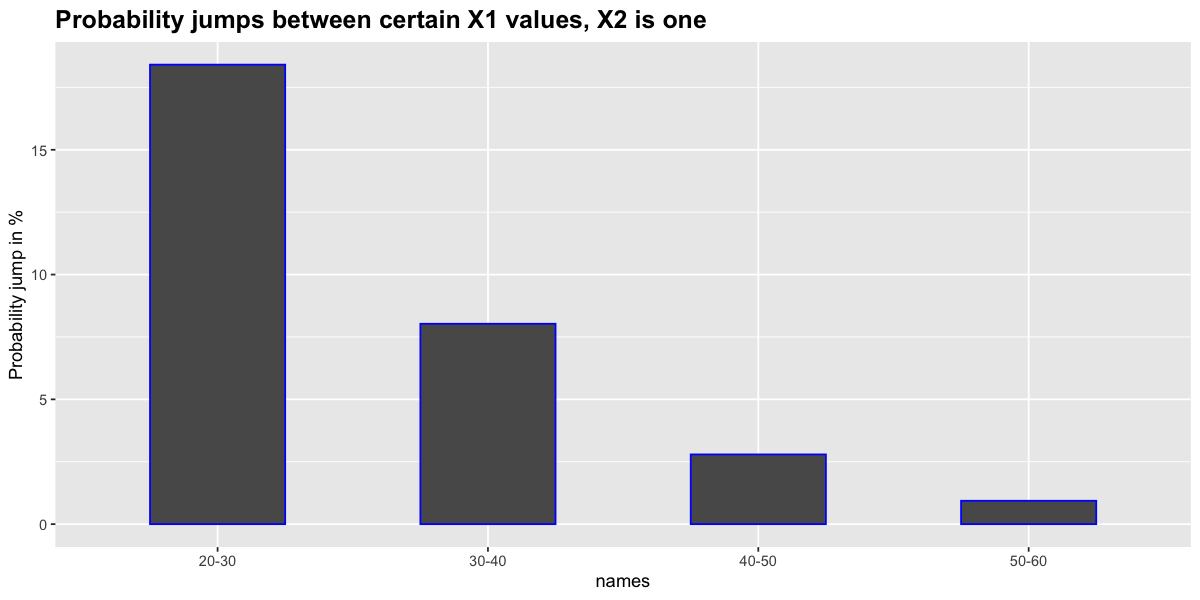

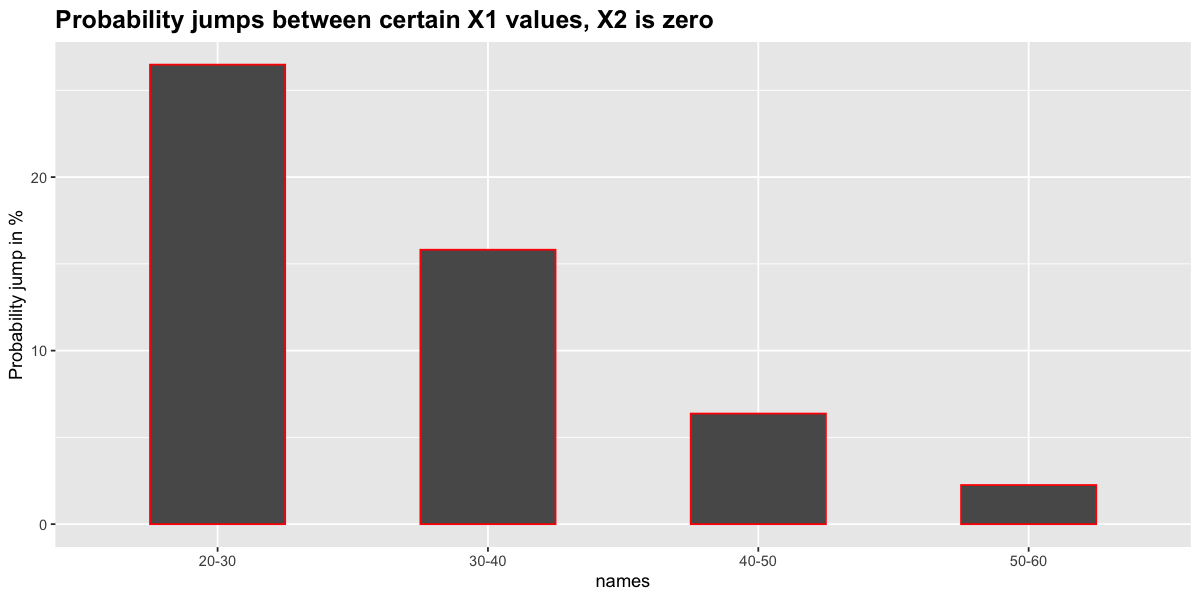

In [16]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(prob_jump, aes(x=names, y=X_2_1*100)) + 
        ggtitle("Probability jumps between certain X1 values, X2 is one")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        ylab("Probability jump in %")+
        geom_bar(stat = "identity", width=0.5, color = "blue")

ggplot(prob_jump, aes(x=names, y=X_2_0*100)) + ggtitle("Probability jumps between certain X1 values, X2 is zero")+
        ylab("Probability jump in %")+  
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_bar(stat = "identity", width=0.5, color = "red")

#### f) Visualize the results, including uncertainty around the estimates. 

- Now we are using 95% confidence intervalls and compute the marginal effects for these intervalls as well.


- The formula for computing confidence intervalls ´for logit models are out of ELSM2.


- The differences in SD between the inbuilt function GLM and our calculations could be due to the robust standard errors used by the GLM function.


- Since the parameter 𝛽𝑗 is estimated using Maxiumum Likelihood Estimation, MLE theory tells us that it is asymptotically normal and hence we can use the large sample Wald confidence interval to get the usual


- 𝛽𝑗±𝑧∗𝑆𝐸(𝛽𝑗)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-3.13754060,-1.7011080
X_1,0.09376577,0.1387169
X_2,0.50543625,1.3153327


,x_value,beta_0_confint,beta_1_confint,beta_2_confint
,<dbl>,<dbl>,<dbl>,<dbl>
2.5%,1,-3.114024,0.09330362,0.5008330
Estimate,1,-2.403833,0.11534682,0.9047881
97.5%,1,-1.693641,0.13739002,1.3087431


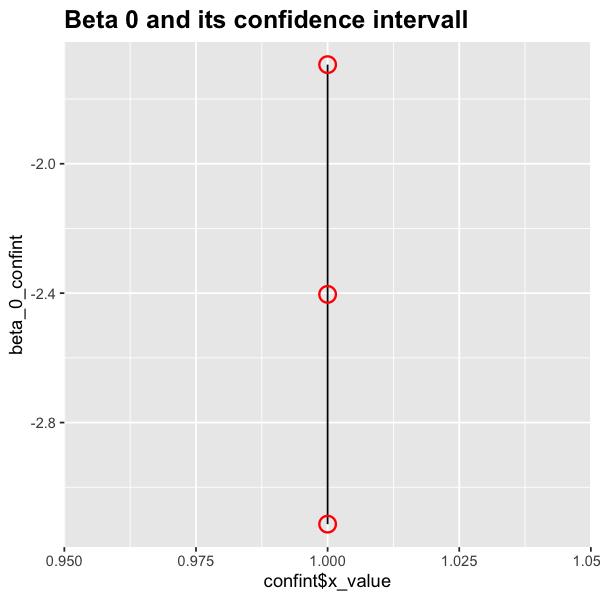

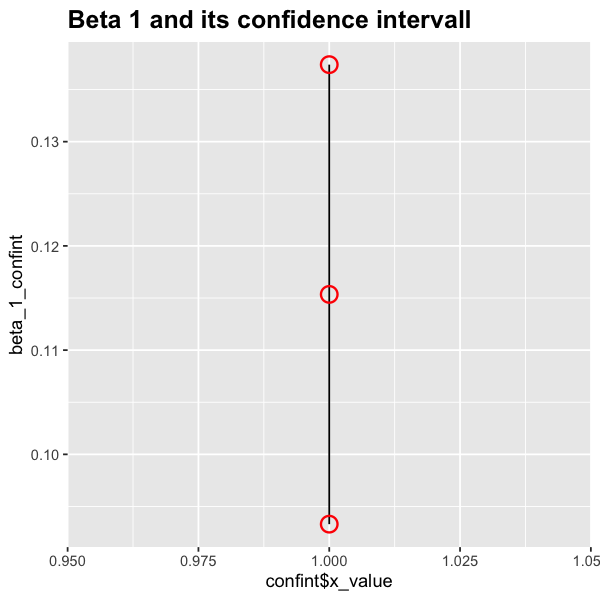

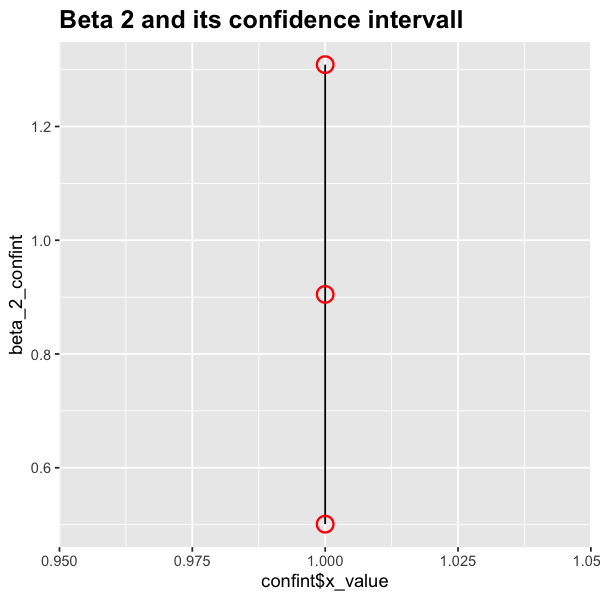

In [17]:
#calculating the confidence intervalls for the three coefficients. 
beta_0_confint = c(estim_par[1]-1.96*sde[1], estim_par[1], estim_par[1]+1.96*sde[1])   
beta_1_confint = c(estim_par[2]-1.96*sde[2], estim_par[2], estim_par[2]+1.96*sde[2])
beta_2_confint = c(estim_par[3]-1.96*sde[3], estim_par[3], estim_par[3]+1.96*sde[3])
confint = data.frame(row.names = c("2.5%  ", "Estimate", "97.5%"),x_value=rep(1,3), beta_0_confint, beta_1_confint, beta_2_confint)

suppressWarnings(confint(glm_fit))
confint 
#estim_par[]
#sde
options(repr.plot.width=5, repr.plot.height=5)

Beta_1_plot = ggplot(confint, mapping = aes(x =confint$x_value, y = beta_1_confint)) +   
        ggtitle("Beta 1 and its confidence intervall")+
        geom_line()+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_point(data=data.frame(confint[,3]),
             pch=21, fill=NA, size=4, colour="red", stroke=1)

Beta_2_plot = ggplot(confint, mapping = aes(x = confint$x_value, y = beta_2_confint)) +   
        ggtitle("Beta 2 and its confidence intervall")+
        geom_line()+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_point(data=data.frame(confint[,4]),
             pch=21, fill=NA, size=4, colour="red", stroke=1)

Beta_0_plot = ggplot(confint, mapping = aes(x = confint$x_value, y = beta_0_confint)) +   
        ggtitle("Beta 0 and its confidence intervall")+
        geom_line()+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_point(data=data.frame(confint[,2]),
             pch=21, fill=NA, size=4, colour="red", stroke=1)


#        geom_point(data=df[which.max(df$loglikelihood),],
#             pch=21, fill=NA, size=4, colour="red", stroke=1)


suppressWarnings(print(Beta_0_plot))
suppressWarnings(print(Beta_1_plot))
suppressWarnings(print(Beta_2_plot))


### Exercise 2
### Calculate the average training error and the average prediction error for 100 simulation runs

- For this task to be easier, we have to automate the whole process of data generation first, which we already did in the last exercise. 
- For this purpose I write a "simulation" function, which simulates the data, computes the estimates and performs some sort of performance measurement for given parameters

In [18]:
#Functions 
Data_Generator = function(X, beta) {
    pi = c() 
    Y = c()
    Y_test = c()
    pi = exp(beta[1] + beta[2] * X[,2]+beta[3]*X[,3]) / (1 + exp(beta[1] + beta[2] * X[,2]+beta[3]*X[,3]))
    for (i in 1:length(pi)){
        Y[i] = rbinom(n = 1, size = 1, prob = pi[i])
    }

    return(cbind(Y,pi))
}


loglike_train = function(beta)#the likelihood function for the logit model from the lecture
{
  ll <- sum(-Y_train*log(1 + exp(-(X_train%*%beta))) - (1-Y_train)*log(1 + exp(X_train%*%beta)))
  return(ll)
}


simulation = function (it, N, bi_prob_x2, beta, min_X, max_X, cutoff ){
    #defining stores 
    AVES = matrix(NA, nrow = it, ncol = 6)
    
    for (i in 1:it){ #simulation runs -> 100 
    
        prediction_n_error = matrix(NA, nrow = N, ncol = 6)   #storing matrix for probabilitY, prediction and error 
        #train data: We need the X_train and Y_train for the loglikelihood function
        X_train <<- cbind(rep(1, N), sort(runif(N, min = min_X, max = max_X)), rbinom(n = N, size = 1 ,prob = bi_prob_x2)) #X is big, Y is small. Refactor later
        Data_train <<- Data_Generator(X_train, beta)
        Y_train <<- Data_train[,1]
        Data_b_train = data.frame(cbind(Y_train, X_train))
        #test data
        X_test <<- cbind(rep(1, N), sort(runif(N, min = min_X, max = max_X)), rbinom(n = N, size = 1 ,prob = bi_prob_x2)) #X is big, Y is small. Refactor later
        Data_test <<- Data_Generator(X_test, beta)
        Y_test <<- Data_test[,1]
        Data_b_test <<- data.frame(cbind(Y_test, X_test))
        
        #getting the beta values
        estim = maxBFGS(loglike_train,finalHessian=TRUE,start=c(1,0.1,1))#initialize estimation procedure.
        estim_par = estim$estimate# give out parameter estimates.
    
        
        #making prediction for test and training samples
        #prediction_n_error[,1] = exp(estim_par[1] + estim_par[2] * X_train[,2] + estim_par[3]*X_train[,3]) / (1 + exp(estim_par[1] + estim_par[2] * X_train[,2]+ estim_par[3]*X_train[,3]))
        prediction_n_error[,1] = exp(X_train%*%estim_par)/(1+exp(X_train%*%estim_par))  #prediction of the probabilities
        prediction_n_error[,2] = ifelse(prediction_n_error[,1] > cutoff, 1, 0) #I know it should ALWAYS predict a one
        prediction_n_error[which(is.na(prediction_n_error[,2])),5] = 1
        prediction_n_error[,3] = ifelse(prediction_n_error[,2] == Y_train, 0, 1) #Love this if stYle, newlY acquired
        
        prediction_n_error[,4] = exp(X_test%*%estim_par)/(1+exp(X_test%*%estim_par)) #probs; here is sometimes a problem that it cannot compute the value.
        prediction_n_error[,5] = ifelse(prediction_n_error[,4] > cutoff, 1, 0)     #preds
        prediction_n_error[which(is.na(prediction_n_error[,5])),5] = 1
        prediction_n_error[,6] = ifelse((prediction_n_error[,5] == Y_test), 0, 1)   #AMR Test
        # calculating the mean
        for (k in 1:6){
                AVES[i,k] = mean(prediction_n_error[,k]) #average MR train
        }
    }
    return(AVES)
}

### Simulation 

#### Note: We had to assure that some variables are accessible globally in order to use the in class given method for maximization
#### We stated some of the parameter values again to be clear about them. 

In [22]:
### set.seed(44)
it = 100
AVES = matrix(NA, nrow = it, ncol = 6) 
percentage = data.frame()
N = 100
bi_prob_x2 = 0.5
beta = c(-2,0.1,1)
min_X = 18
max_X = 60
cutoff = 0.5

AVES = simulation(it, N,bi_prob_x2, beta, min_X, max_X, cutoff)

#### Plotting

In [23]:
percentage = data.frame(rbind(mean(ifelse(AVES[,3] > AVES[,6], 1, 0)), mean(ifelse(AVES[,3] > AVES[,6], 0, 1))))
rownames(percentage) = c("share_train_error_higher","share_test_error_higher")
colnames(percentage)[1] = "values" 
AVES_plot = data.frame(cbind(seq(1,it),AVES))
colnames(AVES_plot) = c("iteration", "Mean_predicted_probabilities_train", "Mean_predicted_value_train","AMR_train",  "Mean_predicted_probabilities_test", "Mean_predicted_value_test","AMR_test" )


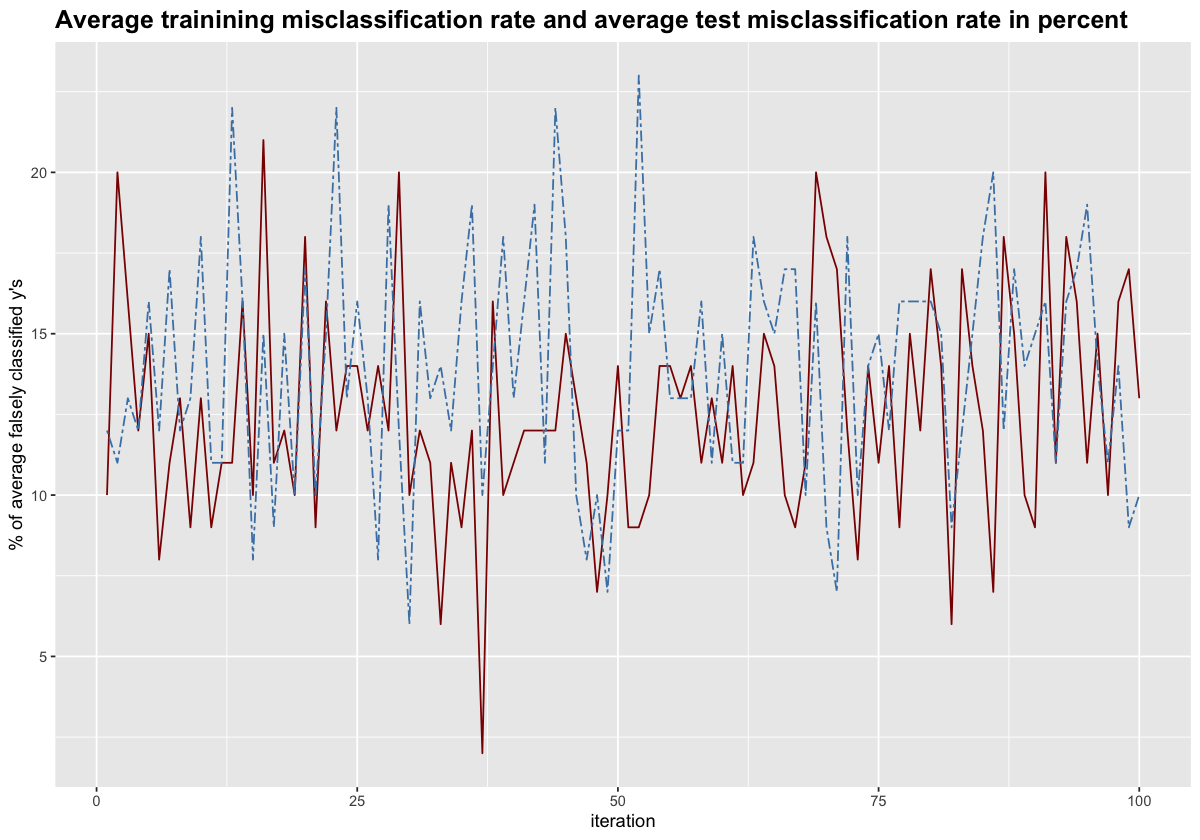

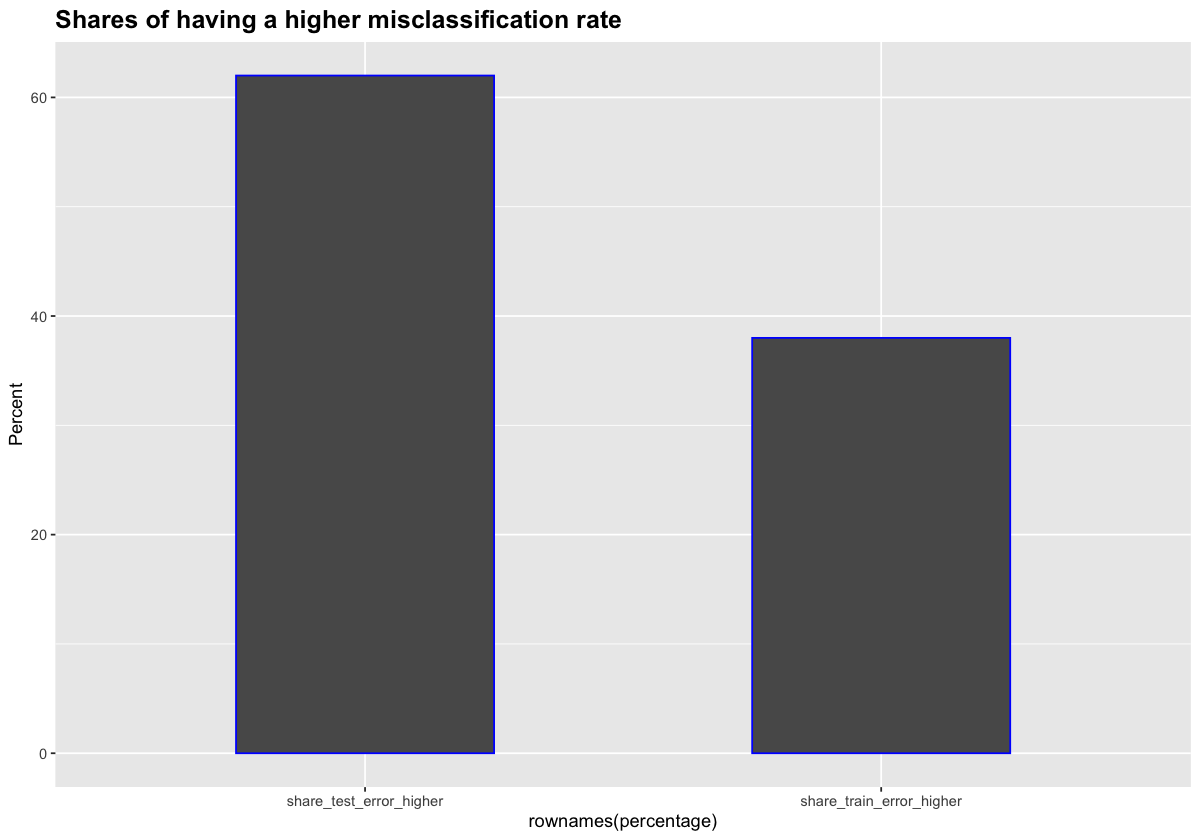

In [24]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(AVES_plot, aes(x = iteration)) +   
    ggtitle("Average trainining misclassification rate and average test misclassification rate in percent")+
    geom_line(aes(y = AMR_train*100), color = "darkred")+ 
    geom_line(aes(y = AMR_test*100), color="steelblue", linetype="twodash") +
    theme(plot.title = element_text(size = 15, face = "bold"))+
    ylab("% of average falsely classified y's")

ggplot(percentage, aes(x = rownames(percentage), y= values*100)) + 
    theme(plot.title = element_text(size = 15, face = "bold"))+
    ggtitle("Shares of having a higher misclassification rate")+
    ylab("Percent")+
    geom_bar(stat = "identity", width=0.5, color = "blue")

### b) Consider the way the data is generated. Propose and implement a change in the data generating process that (by your conjecture) will lead to an increase in the test error rate, but a decrease in the training error rate. 

#### Sample size

Lowering the sample size should lead to a divergence of test and training error, holding all other things constant. <br>
- This gives the model a possibility to overfit on the training data
- the restatement of the parameters of the model is purely for educational reasons

In [25]:
#What to iterate over: 
sample_size = rev(seq(10,100, by = 5))
#store for the new results: 
Mean_AVES = matrix(NA, nrow = length(sample_size), ncol = 3) #first col beta0 ,sec col trianing, third col test
##the remaining variables stay the same, I just state them here for educational purposes
it = 100
AVES = matrix(NA, nrow = it, ncol = 2) 
percentage = data.frame()
#N = 100 because this is not used here
bi_prob_x2 = 0.5
beta = c(-2,0.1,1)
min_X = 18
max_X = 60
cutoff = 0.5

In [26]:
for (i in 1:length(sample_size)) { #for every sample size do the simulation, save the AME for training and test
    AVES = simulation(it, sample_size[i] ,bi_prob_x2, beta, min_X, max_X, cutoff)
    Mean_AVES[i,1] = sample_size[i]
    Mean_AVES[i,2] = mean(AVES[,3])
    Mean_AVES[i,3] = mean(AVES[,6])
}
Mean_AVES = data.frame(Mean_AVES)
colnames(Mean_AVES) = c("Sample_size","Mean_avg_misclassification_rate_training","Mean_avg_misclassification_rate_test")

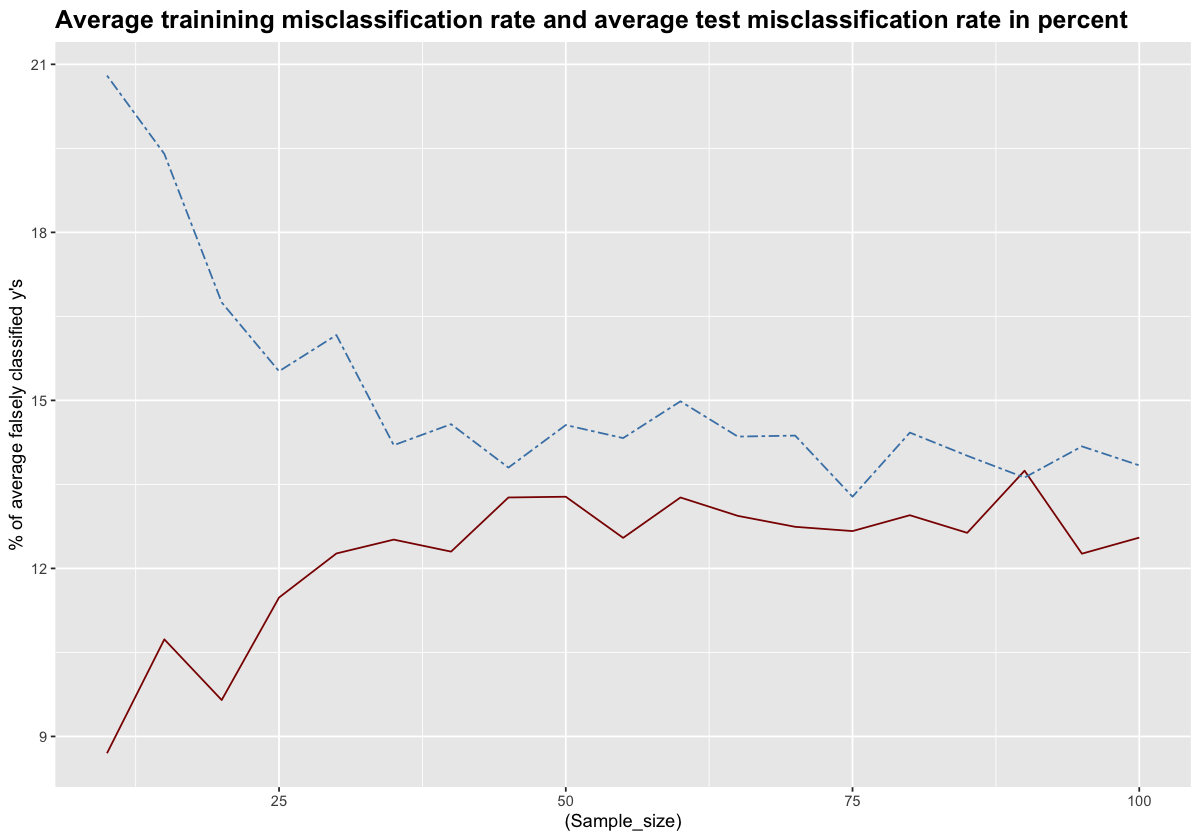

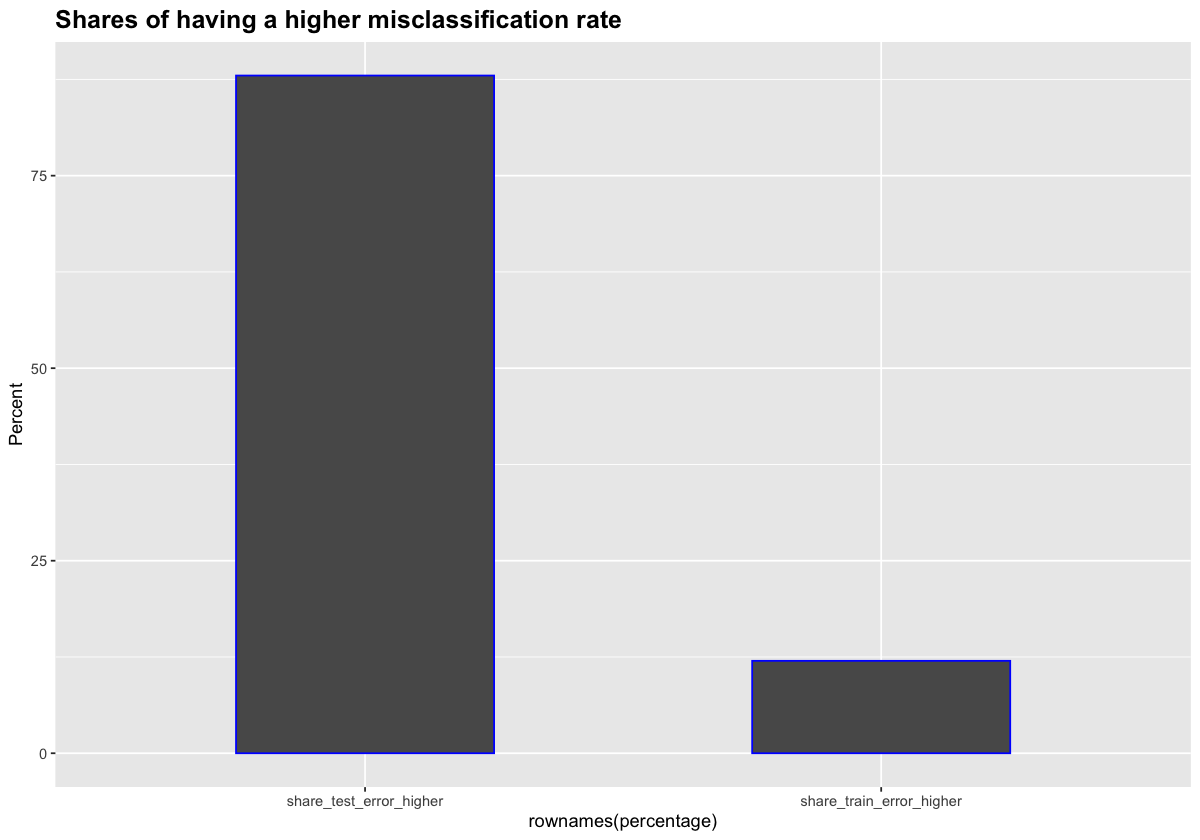

In [27]:
#Mean_AVES
options(repr.plot.width=10, repr.plot.height=7)



ggplot(Mean_AVES, aes(x = (Sample_size))) +   
    ggtitle("Average trainining misclassification rate and average test misclassification rate in percent")+
    theme(plot.title = element_text(size = 15, face = "bold"))+
    geom_line(aes(y = Mean_avg_misclassification_rate_training*100), color = "darkred")+ 
    geom_line(aes(y = Mean_avg_misclassification_rate_test*100), color="steelblue", linetype="twodash") +
    ylab("% of average falsely classified y's")


#percentage of the last iteration, not a sustainable way of coding, just for showing purposes; not part of the actual solution
percentage = data.frame(rbind(mean(ifelse(AVES[,3] > AVES[,6], 1, 0)), mean(ifelse(AVES[,3] > AVES[,6], 0, 1))))
rownames(percentage) = c("share_train_error_higher","share_test_error_higher")
colnames(percentage)[1] = "values" 
ggplot(percentage, aes(x = rownames(percentage), y= values*100)) + 
    ggtitle("Shares of having a higher misclassification rate")+
    theme(plot.title = element_text(size = 15, face = "bold"))+
    ylab("Percent")+
    geom_bar(stat = "identity", width=0.5, color = "blue")

- This is exactly what we wanted to see, the reason here is simple: With a very small sample size, we cut the signal given to the model but we also give the model the possibility to crucially overfit on a small set of data. 
- This overfitted model typically does not work well when given new data, since the estimates are quite variant. 

### c) Bonus: Consider your assignment in 1 c): Propose changes in the DGP that would make the likelihood function less informative over the range of parameter values. Implement these changes and show you results graphically. 

#### Making the likelihood function less informative: One idea was to make the beta parameter higher.
- The idea here is to make the beta SO informative, that the algorithm cannot really pin down the value of beta, because a higher beta value would not really contribute to higher probability density. 

#### How to access the number of iterations needed? 
- Fisher scoring is a hill-climbing algorithm for getting results - it maximizes the likelihood by getting successively closer and closer to the maximum by taking another step ( an iteration).  It knows when it has reached the top of the hill in that taking another step does not increase the likelihood.  It is known to be an efficient procedure - not many steps are usually needed - and generally converges to an answer. When this is the case you do not need to be concerned about it - accept what  you have got. Changing metaphors,  you can drive the car without knowing how the internal combustion engine works.


#### Motivating graph

In [28]:
#New dgp 
N = 1000
bi_prob_x2 = 0.5
beta = c(-2,2,1)
X_1 = sort(runif(N, min = 18, max = 60)) #we kept X_1 and X_2 explicitely to use some code out of the classificaition script
X_2 = rbinom( n = N, size = 1 ,prob = bi_prob_x2)
X = cbind(rep(1, N), X_1, X_2) #X is big, y is small. Refactor later
Data = Data_Generator(X, beta)
Y = Data[,1]
Data_b = data.frame(cbind(Y, X))

likelihood_possible_betas_new = c()
beta_grid = seq(-1,1, by = 0.01)
v_beta_1 = cbind(rep(-2, length(beta_grid)), beta_grid, rep(1, length(beta_grid)))  #here we vary beta1 

for (j in 1:length(beta_grid)){
    likelihood_possible_betas_new[j] = likelihood(v_beta_1[j,])
}    


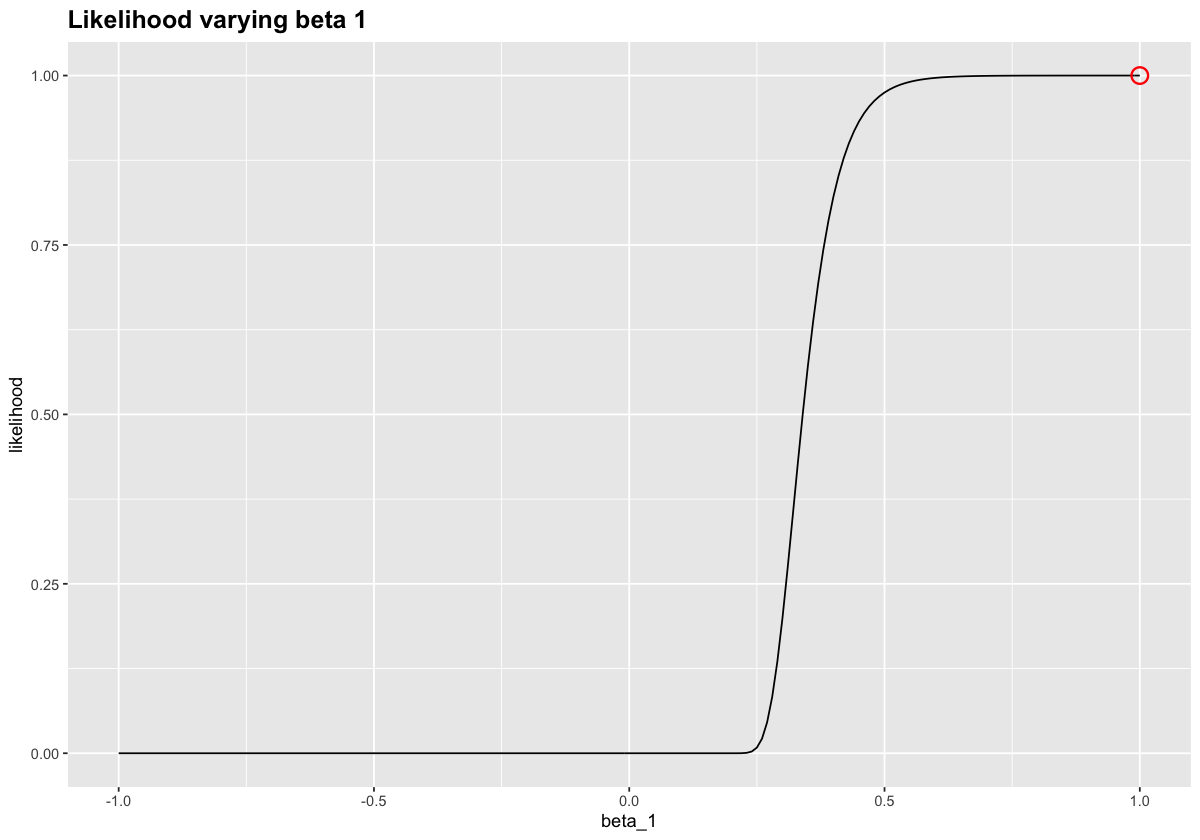

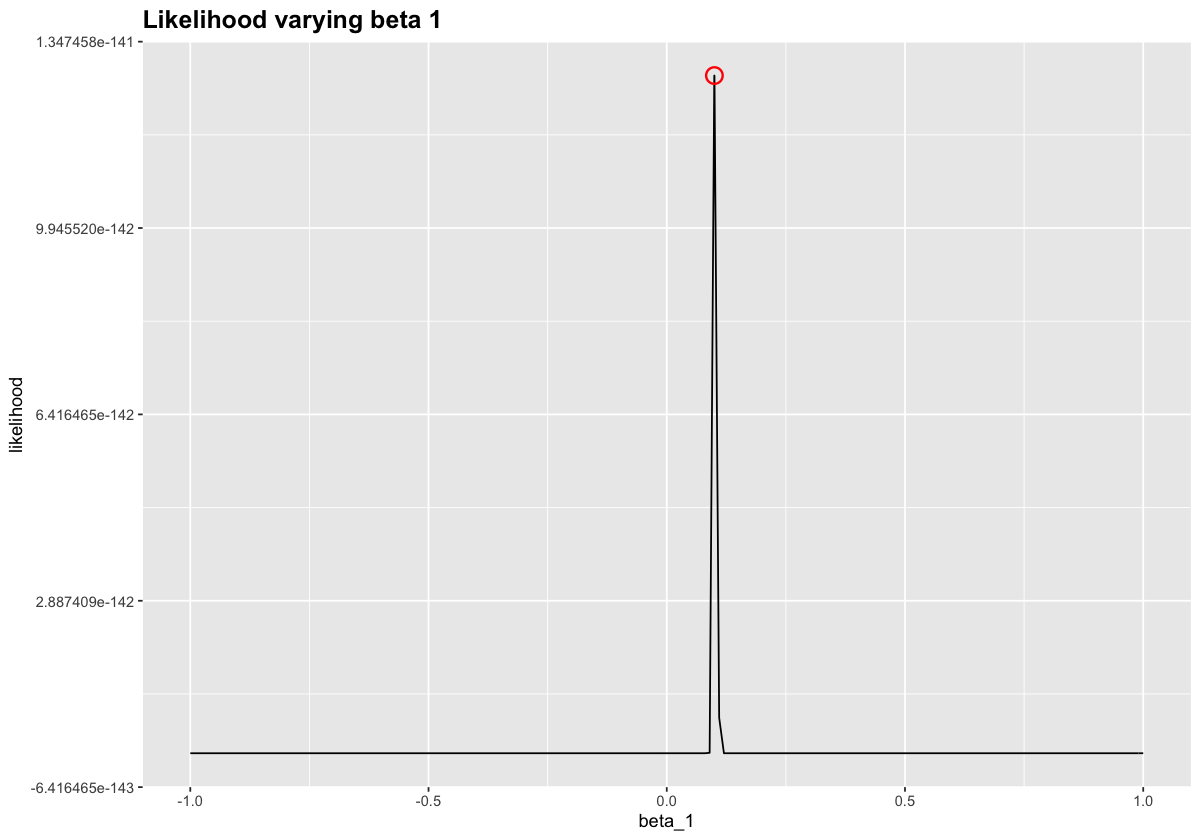

In [29]:
options(repr.plot.width=10, repr.plot.height=7)

df = data.frame(cbind(likelihood = likelihood_possible_betas_new, beta_1 = v_beta_1[,2]))
Likelihood1c = ggplot(df, mapping = aes(x = beta_1, y = likelihood)) +   
        ggtitle("Likelihood varying beta 1")+
        geom_line()+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_point(data=df[which.max(df$likelihood),],
             pch=21, fill=NA, size=4, colour="red", stroke=1)
Likelihood1c
Likelihood1

#### Implementation of the idea

In [30]:
###Functions
### We need a modified version of the simulation function used beforehand, because we are just interested in the iterations 
#(and maybe the bias.)

simulation_bonus = function (it, N, bi_prob_x2,beta, min_X, max_X){
    #defining stores 
    estim_iter = c(rep(NA, it))
    
    for (i in 1:it){ #simulation runs -> 100 
    
        ###For the GLM function we seperately define X_0, 1 and 2
        X_0 = rep(1, N)
        X_1 = sort(runif(N, min = min_X, max = max_X))
        X_2 = rbinom(n = N, size = 1 ,prob = bi_prob_x2)
        X_bonus = cbind(X_0, X_1 ,X_2 ) 
        
        Data_bonus = Data_Generator(X_bonus, beta)
        Y_bonus = Data_bonus[,1]
        Data_b = data.frame(cbind(Y_bonus, X_bonus))
        
        #getting the beta values
        glm_fit=suppressWarnings(glm(Y_bonus ~ X_1 + X_2, data=Data_b ,family=binomial))
        #print(glm_fit$iter )
        estim_iter[i] = glm_fit$iter                # give out parameter estimates.
        #print(glm_fit$iter) 
        
    }  
    return(c(beta[2],mean(estim_iter)))
}

In [31]:
##what to vary
beta_grid_2 = seq(0,1, by = 0.01)
#### Parameters
it = 10
N = 100
bi_prob_x2 = 0.5
min_X = 18
max_X = 60
cutoff = 0.5

In [32]:
#storing parameter 
iterations_b = matrix(NA, ncol = 2, nrow = length(beta_grid_2))
estim_iter = c(rep(NA, length(beta_grid_2)))

for (i in 1:length(beta_grid_2)){
        beta_bonus = cbind(-2,beta_grid_2[i],1)
        iterations_b [i,]= c(simulation_bonus(it, N, bi_prob_x2,beta_bonus, min_X, max_X))
} 


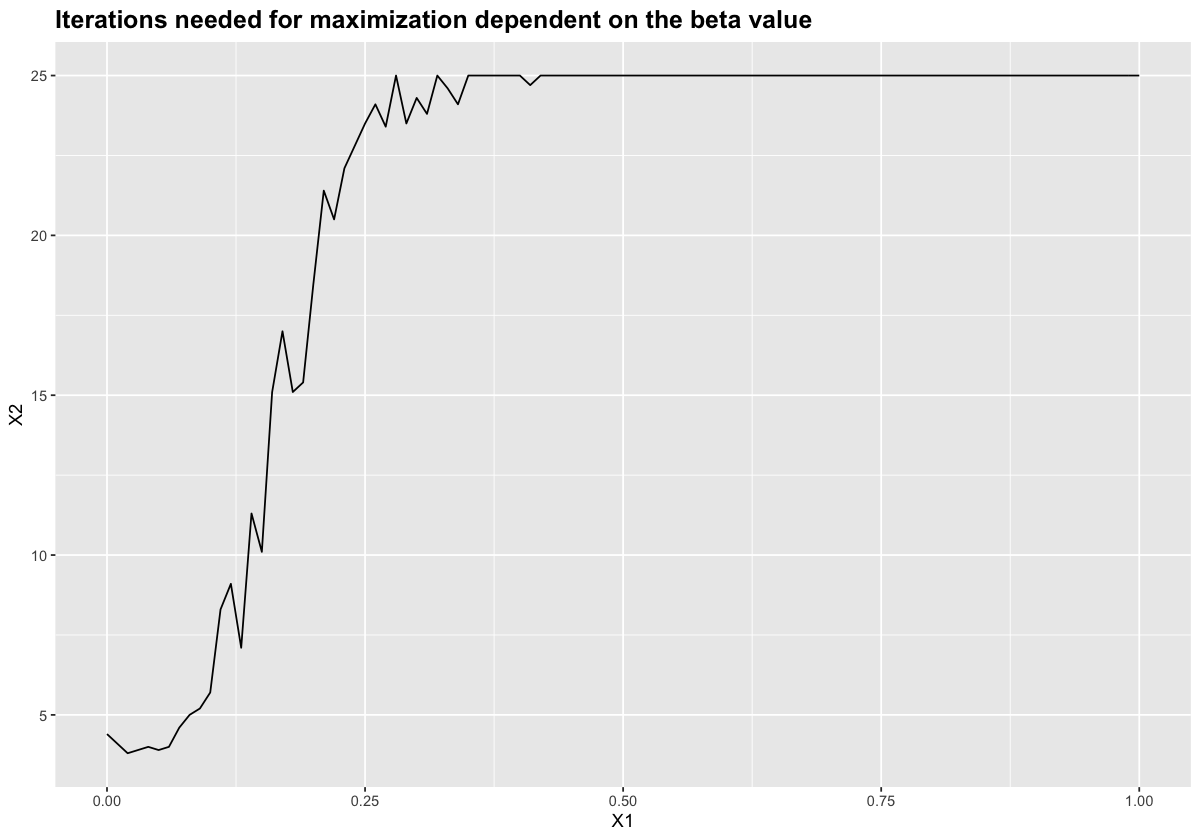

In [34]:
options(repr.plot.width=10, repr.plot.height=7)

iterations_b = data.frame(iterations_b)
Iterationplot = ggplot(iterations_b, mapping = aes(x = X1, y = X2)) +   
        ggtitle("Iterations needed for maximization dependent on the beta value")+
        theme(plot.title = element_text(size = 15, face = "bold"))+
        geom_line()

Iterationplot

#### Final remarks
- Not only the iterations are starting to add up, but the not computable iterations are more often as well
- On top of that, the parameters are heavily biased.

#### Another idea: Systematically changing the parameter

To make the likelihood function less informative we consider changing the beta coefficients, shrinking them down to zero. We consider beta combinations, starting from the given one $\beta_0 = 1$, $\beta_1 = 0.1 $, $\beta_2 = 1$. Each iteration we shrink the parameter values by 10% of their initial value, i.e. $\beta_0$ by $0.1$.
Taken from the book "ELS2", we use the method to compute exp($\beta_1$) to get an estimate of the percentage change of probabilities of "" percent. 
One aspect we could consider is the value of the intercept $\beta_0$. In difference to the in class example it is chosen such that it is a viable method always to chose 1 instead of zero. If we successively lower the value, thus making the other variables more important one could favor the training data vs. the test data. 
